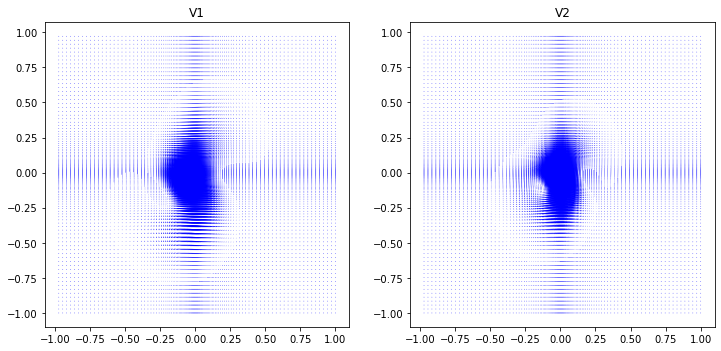

'\n# Create Animation Plot/File\nfig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6), sharex=True, sharey=True)\nplt.suptitle(\'Vectors, $it$ = \'+ str(0), fontsize=14)\nax1 = axes[0]\nax2 = axes[1]\n\nu1, v1 = Vx1[:,:,0], Vy1[:,:,0]\nu2, v2 = Vx2[:,:,0], Vy2[:,:,0]\nax1.quiver(x, y, u1, v1, color=\'b\', alpha=1)#, scale=1)\nax2.quiver(x, y, u2, v2, color=\'g\', alpha=1)#, scale=1)\nax1.set_title(\'V1, $t$ = \'+ str(t1[0]))\nax2.set_title(\'V2, $t$ = \'+ str(t2[0]))\nax1.set_aspect(\'equal\')\nax2.set_aspect(\'equal\')\n\n# To animate the quiver, we can change the u and v values, in animate() method.\ndef animate(it):\n    print("it = ",it)\n    u1, v1 = Vx1[:,:,it], Vy1[:,:,it]\n    u2, v2 = Vx2[:,:,it], Vy2[:,:,it]\n    ax1.quiver(x, y, u1, v1, color=\'b\', alpha=1)#, scale=1)\n    ax2.quiver(x, y, u2, v2, color=\'g\', alpha=1)#, scale=1)\n    ax1.set_title(\'V1, $t$ = \'+ str(t1[it]))\n    ax2.set_title(\'V2, $t$ = \'+ str(t2[it]))\n    plt.suptitle(\'Vectors, $it$ = \'+ str(i

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#-----------
# Read Data
#-----------

# Open File
h5file = 'simVectors010105.h5'
f = h5py.File(h5file)

# Read Grid/Time Vectors
t1 = f['t1']
t2 = f['t2']
x = f['x']
y = f['y']

# Get Sizes
nt = np.size(t1)
nx = np.size(x,0)
ny = np.size(y,0)

# Get Vectors
Vx1 = f['Vx1']
Vy1 = f['Vy1']
Vz1 = f['Vz1']

Vx2 = f['Vx2']
Vy2 = f['Vy2']
Vz2 = f['Vz2']

#-------------------------
# Create Animations/Plots
#-------------------------

#"""
# Create Single Frame Plot
fig = plt.figure(figsize =(12, 6))

it = 300
ax = fig.add_subplot(121)
ax.quiver(x,y,Vx1[:,:,it],Vy1[:,:,it], color='b', alpha=1)
ax.set_title('V1')
ax.set_aspect('equal')

ax = fig.add_subplot(122)
ax.quiver(x,y,Vx2[:,:,it],Vy2[:,:,it], color='b', alpha=1)
ax.set_title('V2')
ax.set_aspect('equal')

plt.show()
#"""

"""
# Create Animation Plot/File
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6), sharex=True, sharey=True)
plt.suptitle('Vectors, $it$ = '+ str(0), fontsize=14)
ax1 = axes[0]
ax2 = axes[1]

u1, v1 = Vx1[:,:,0], Vy1[:,:,0]
u2, v2 = Vx2[:,:,0], Vy2[:,:,0]
ax1.quiver(x, y, u1, v1, color='b', alpha=1)#, scale=1)
ax2.quiver(x, y, u2, v2, color='g', alpha=1)#, scale=1)
ax1.set_title('V1, $t$ = '+ str(t1[0]))
ax2.set_title('V2, $t$ = '+ str(t2[0]))
ax1.set_aspect('equal')
ax2.set_aspect('equal')

# To animate the quiver, we can change the u and v values, in animate() method.
def animate(it):
    print("it = ",it)
    u1, v1 = Vx1[:,:,it], Vy1[:,:,it]
    u2, v2 = Vx2[:,:,it], Vy2[:,:,it]
    ax1.quiver(x, y, u1, v1, color='b', alpha=1)#, scale=1)
    ax2.quiver(x, y, u2, v2, color='g', alpha=1)#, scale=1)
    ax1.set_title('V1, $t$ = '+ str(t1[it]))
    ax2.set_title('V2, $t$ = '+ str(t2[it]))
    plt.suptitle('Vectors, $it$ = '+ str(it), fontsize=14)
  
# Create an animation object
ani = animation.FuncAnimation(fig, animate, interval=1, frames = range(0,nt,10), repeat=False)

# write animation as mp4
writer = animation.FFMpegWriter(fps=30)
ani.save('vector_animation.mp4', writer=writer)

# Display the figure
plt.show()
"""



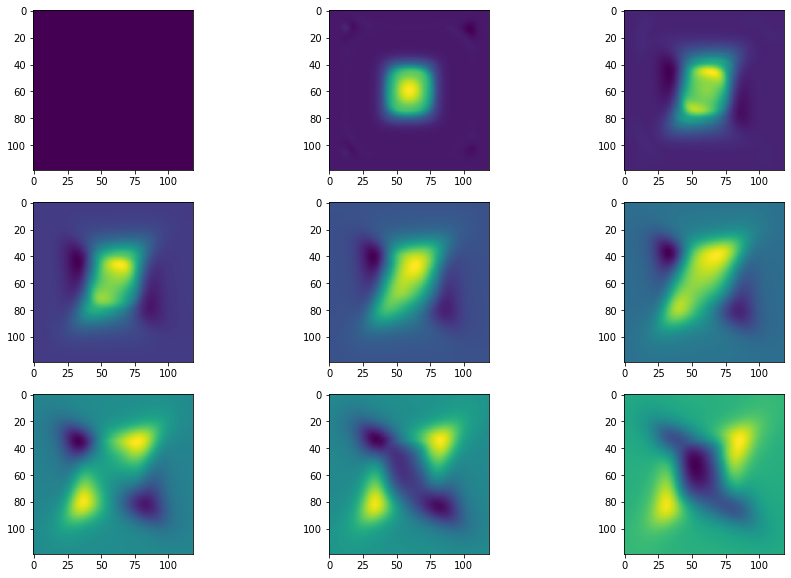

In [5]:
fig = plt.figure(figsize=(15, 10))
for k in range(9):
    uplot = Vx1[:,:,10*k]
    ax = fig.add_subplot(3, 3, k+1)
    ax.imshow(uplot)

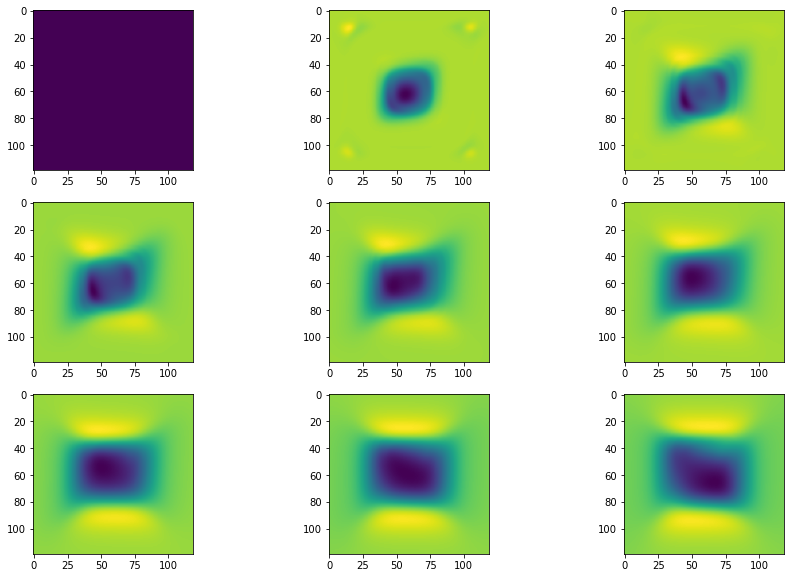

In [6]:
fig = plt.figure(figsize=(15, 10))
for k in range(9):
    uplot = Vy1[:,:,10*k]
    ax = fig.add_subplot(3, 3, k+1)
    ax.imshow(uplot)

In [7]:
Vx1.shape

(119, 119, 1786)

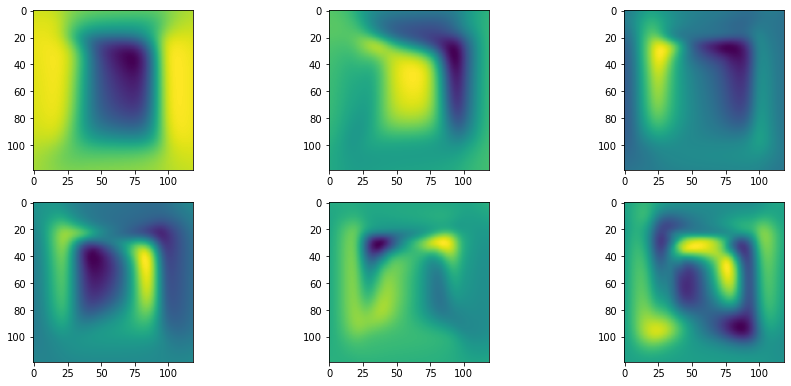

In [8]:
Vx1flat = np.reshape(Vx1, (119 * 119, 1786))
u,s,v=np.linalg.svd(Vx1flat)
fig = plt.figure(figsize=(15, 10))
for k in range(6):
    Up = u[:, k].reshape((119, 119), order='F')
    uplot = Up.T
    ax = fig.add_subplot(3, 3, k+1)
    plt.savefig('u.png')
    ax.imshow(uplot)



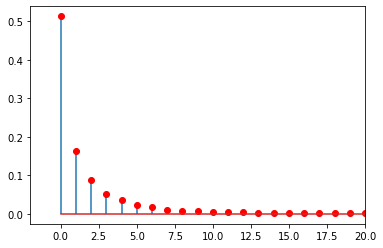

In [9]:
s2=s/np.sum(s)
plt.stem(s2, markerfmt='ro')
plt.xlim(-2, 20)
plt.savefig('sigma.png')

plt.show()


In [10]:
v.shape

(1786, 1786)

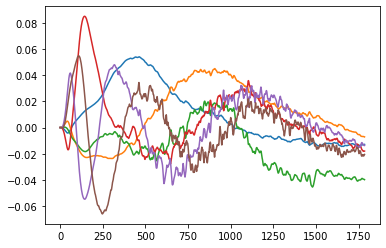

In [11]:
for k in range(6):
    ax = fig.add_subplot(3, 3, k+1)
    plt.plot(v[k,:])

In [12]:
import copy
import numpy as np
import matplotlib.pyplot as plt

from pydmd import DMD
from pydmd.bopdmd import BOPDMD

In [14]:
optdmd = BOPDMD(svd_rank=6, num_trials=10)
optdmd.fit(Vx1flat, t1)

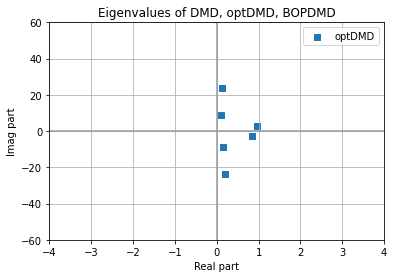

In [15]:
fig, ax = plt.subplots(1, 1)
ax.scatter(
    np.real(optdmd.eigs), np.imag(optdmd.eigs), label="optDMD", marker="s"
)
ax.set_xlabel("Real part")
ax.set_ylabel("Imag part")
ax.legend()
ax.set_ylim(-60, 60)
ax.set_xlim(-4, 4)
ax.grid()
ax.axhline(0, color="0.6")
ax.axvline(0, color="0.6")
ax.set_title("Eigenvalues of DMD, optDMD, BOPDMD")
plt.show()

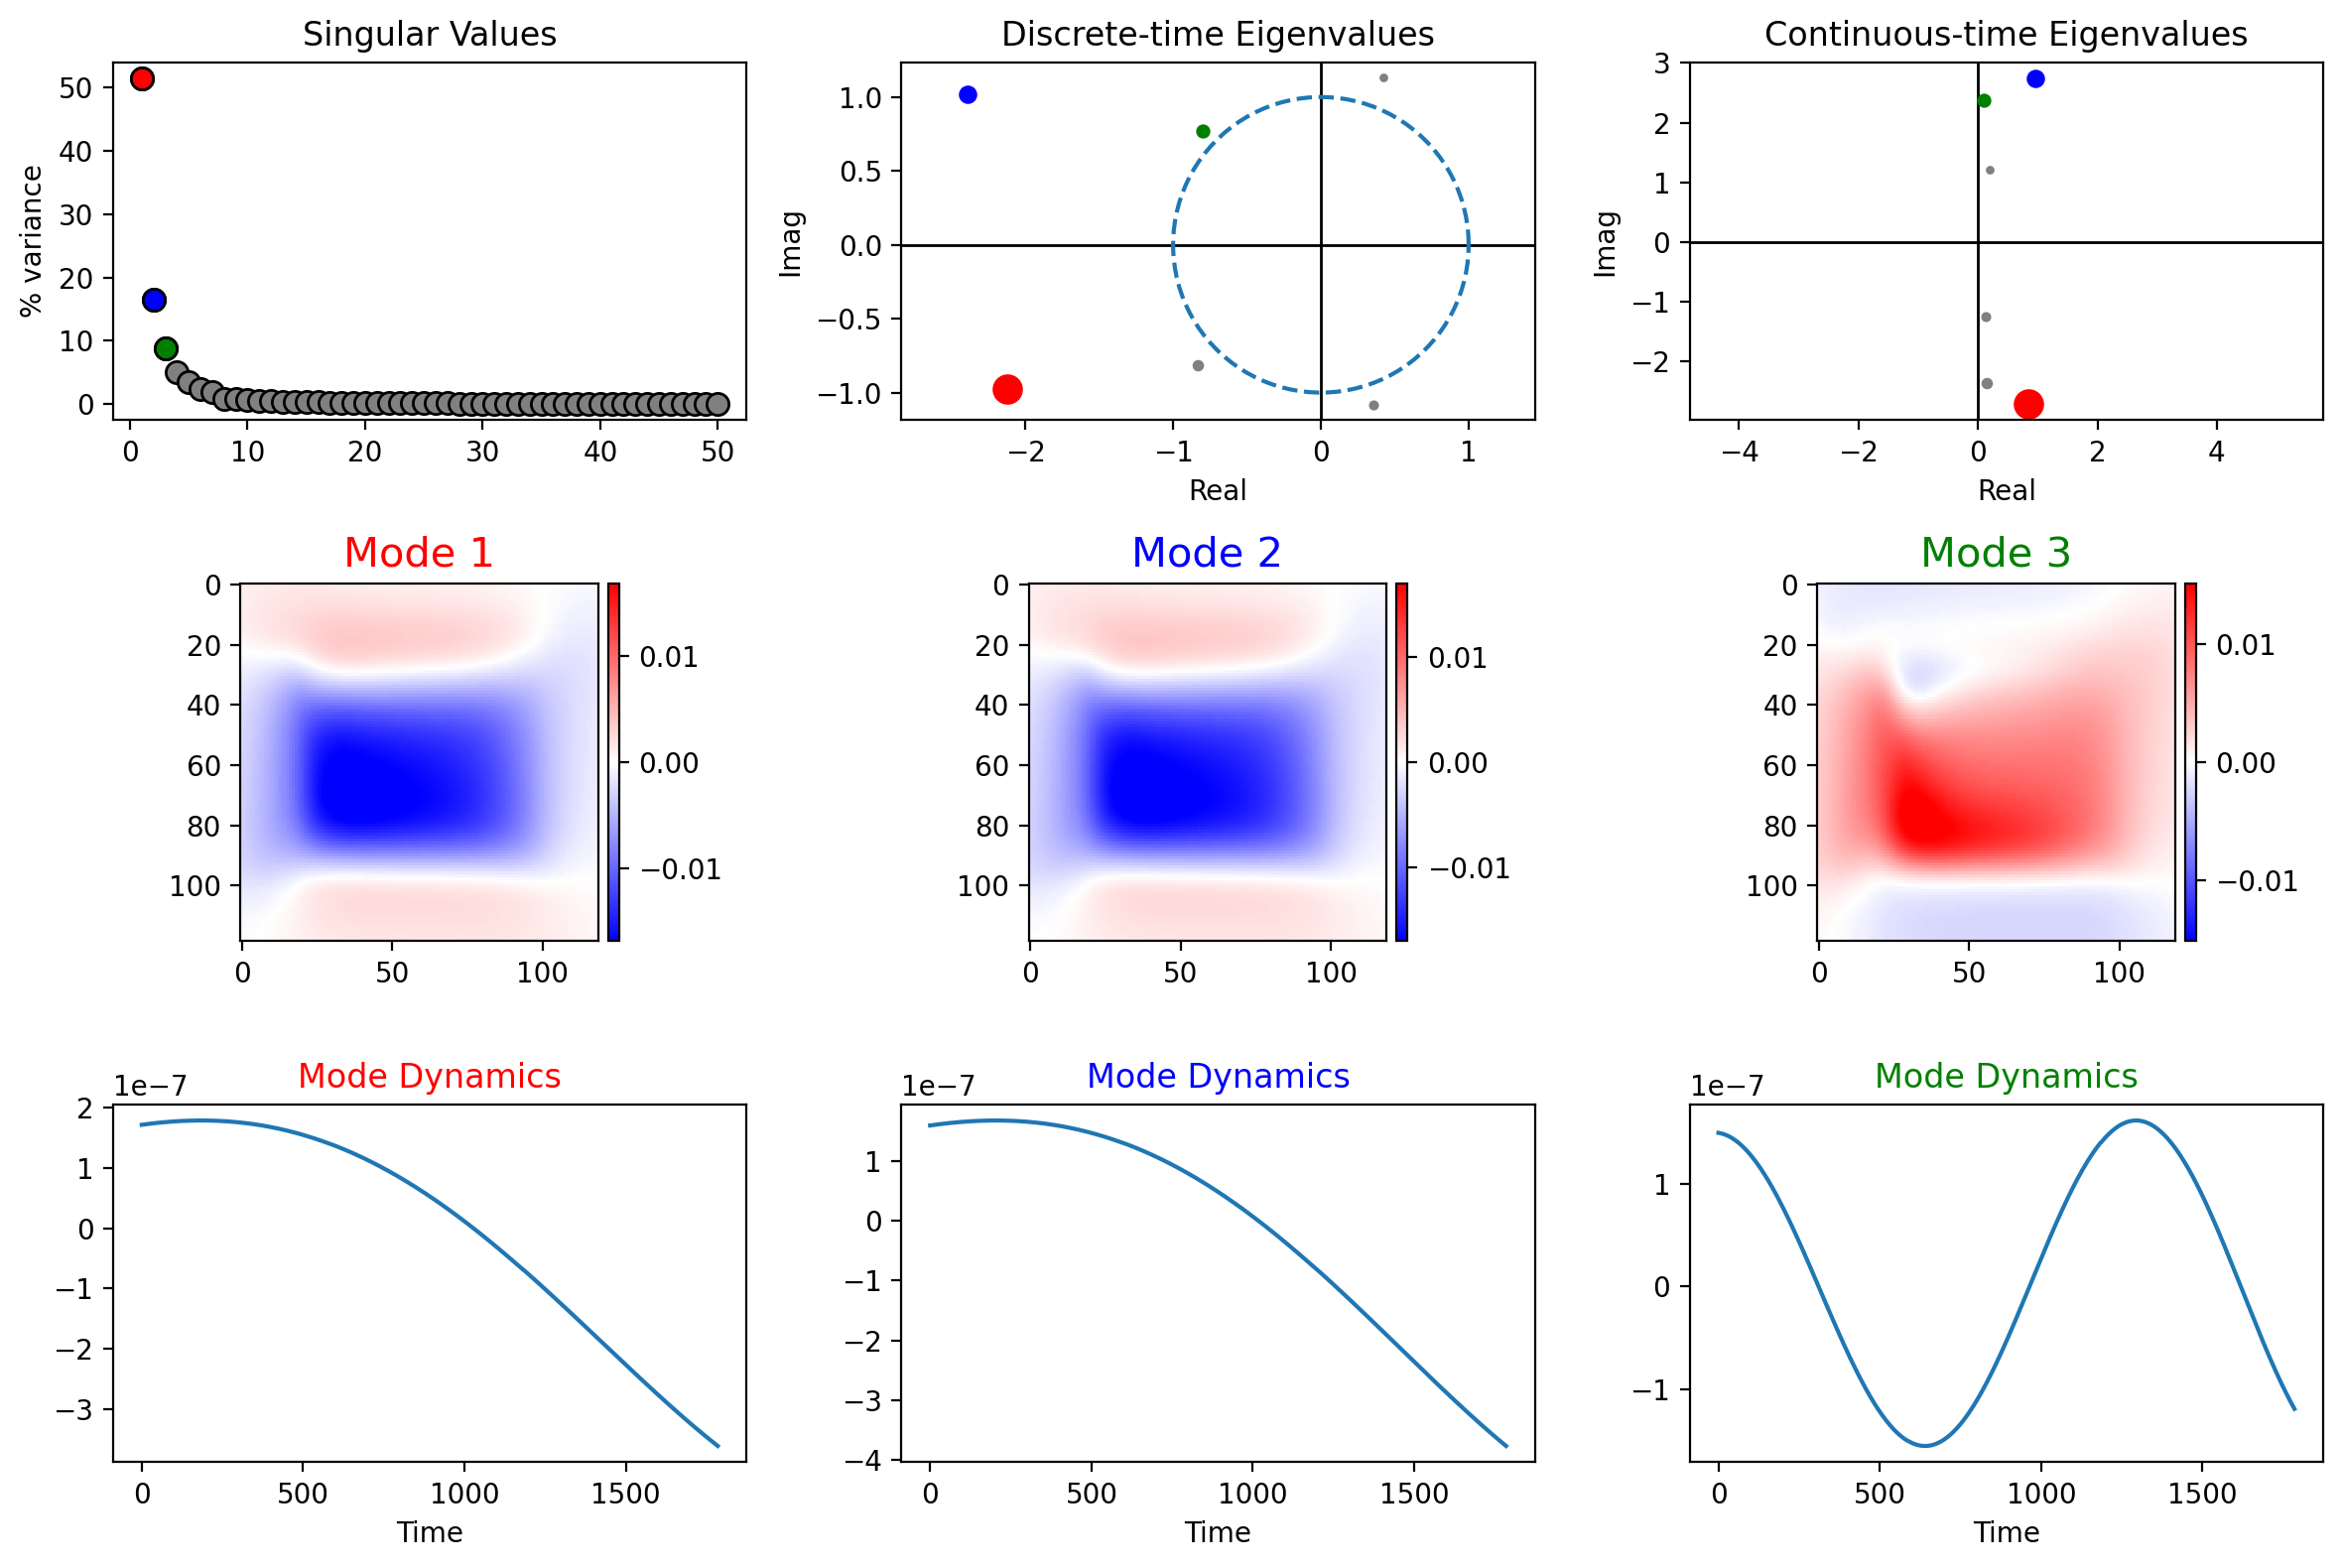

In [18]:
from pydmd.plotter import plot_summary
plot_summary(optdmd, snapshots_shape=(nx,ny),index_modes=[0,1,2], order='F')

In [14]:
(optdmd.dynamics.real.T[:,0]).shape


(1786,)

[legend.py:1228 -   _parse_legend_args() ] No handles with labels found to put in legend.


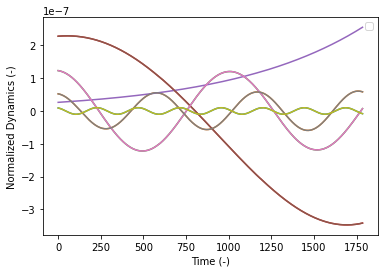

In [13]:
plt.plot(optdmd.dynamics.real.T)
plt.legend()
plt.gca().set_xlabel("Time (-)")
plt.gca().set_ylabel("Normalized Dynamics (-)")
plt.show()


In [14]:
(optdmd.modes[:,0]).real.shape

(14161,)

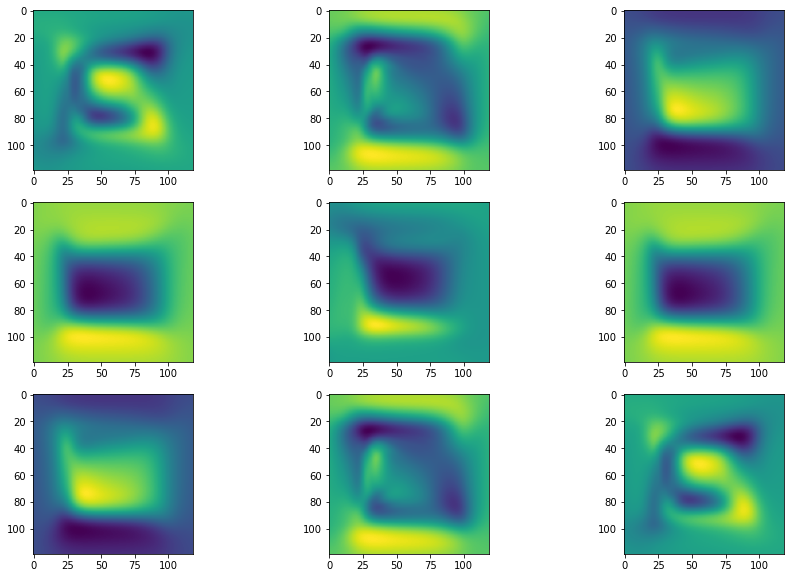

In [15]:
fig = plt.figure(figsize=(15, 10))

for k in range(9):
    optdmd_spatial_modes = ((optdmd.modes[:,k]).real).reshape((119, 119), order='F')
    ax = fig.add_subplot(3, 3, k+1)
    ax.imshow(optdmd_spatial_modes)


